# College Majors Versus Earning Potential

For this project we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

## Aim

To Visualize the effect of gender distribution and popularity of various college majors on the future
earnings potential.

## Dataset

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

Let's start by importing the libraries needed for this project.

In [1]:
# Importing Libraries and to display the plots inline.

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# To avoid truncation of rows and columns in pandas.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# To open the file and to print the first row as a table.

recent_grads = pd.read_csv("recent-grads.csv")
print("The first row in the dataset")
print("----------------------------")
recent_grads.iloc[0]

The first row in the dataset
----------------------------


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                  2339.0
Men                                    2057.0
Women                                   282.0
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                    0.018381
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
# To print the first five rows.

print("The first five rows")
print("-------------------")
recent_grads.head()

The first five rows
-------------------


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
# To print the last five rows.

print("The last five rows")
print("------------------")
recent_grads.tail()

The last five rows
------------------


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


## Data Cleaning

Let's begin our analysis by generating a statistics summary for all columns. 

In [6]:
# To generate summary statistics for all columns.

recent_grads.describe(include = "all")

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,POLITICAL SCIENCE AND GOVERNMENT,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


Now let's check for any missing values in the dataset.

In [7]:
# To view the dtype of each column in dataset.

recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

We can see that there are null values in some columns. Let's drop rows that have null values.

In [8]:
# Droping rows with null values.

raw_data_count = recent_grads.shape[0]
print("The number of rows before droping null values: ", raw_data_count)
recent_grads = recent_grads.dropna(axis = "index")
cleaned_data_count = recent_grads.shape[0]
print("The number of rows after droping null values: ", cleaned_data_count)

The number of rows before droping null values:  173
The number of rows after droping null values:  172


> Thus one row containing NULL value was droped.

Lets rename the columns to snakecase.

In [9]:
# To change the column names.

recent_grads.columns = ["rank", "major_code", "major", "total", "men", "women", "major_category", "women_share", 
                        "sample_size", "employed", "full_time", "part_time", "full_time_year_round", "unemployed",
                        "unemployment_rate", "median", "p25th", "p75th", "college_jobs", "non_college_jobs",
                        "low_wage_jobs"]
print(recent_grads.columns)

Index(['rank', 'major_code', 'major', 'total', 'men', 'women',
       'major_category', 'women_share', 'sample_size', 'employed', 'full_time',
       'part_time', 'full_time_year_round', 'unemployed', 'unemployment_rate',
       'median', 'p25th', 'p75th', 'college_jobs', 'non_college_jobs',
       'low_wage_jobs'],
      dtype='object')


In [10]:
# To view the first two rows.

recent_grads.head(2)

,rank,major_code,major,total,men,women,major_category,women_share,sample_size,employed,full_time,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50


## Data Analysis

Let's begin our analysis by ploting a scatter plot for `sample_size` and `median` column. `sample_size` column represent the unweighted sample size of full time employees and `median` column represent the median salary for various majors. 

<AxesSubplot:title={'center':'sample size versus median salary'}, xlabel='sample_size', ylabel='median'>

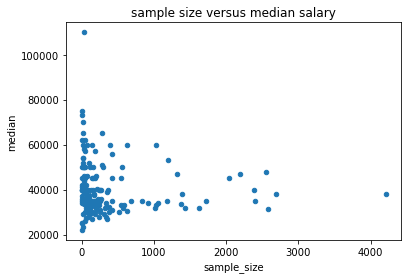

In [11]:
# To scatter plot sample_size and median column.

recent_grads.plot(x='sample_size', y='median', kind='scatter', title = "sample size versus median salary")

Most of the sample_size is less than 500 and most of the median salary is less than 50,000. Most of the data points fit the above scenarios. For others as the sample size increases, the salary tend to decrease. Larger sample size represents a more popular major.

Now let's do a scatter plot for `full_time` and `median` column.

<AxesSubplot:title={'center':'full time versus median salary'}, xlabel='full_time', ylabel='median'>

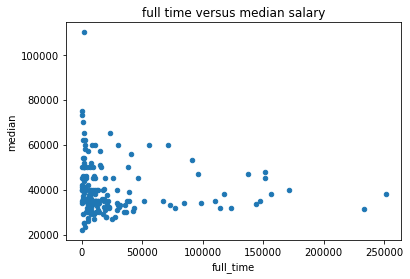

In [12]:
# To scatter plot full_time and median column.

recent_grads.plot(x='full_time', y='median', kind='scatter', title = "full time versus median salary")

As the number of full time employees increases, the median salary tend to decrease. More full time employees represents a more popular major.

> Thus a student pursuing a popular major isn't guaranteed to make more money than those pursuing a less popular major.

Now let's do a scatter plot for `sample_size` and `unemployment_rate` column.

<AxesSubplot:title={'center':'sample size versus unemployment rate'}, xlabel='sample_size', ylabel='unemployment_rate'>

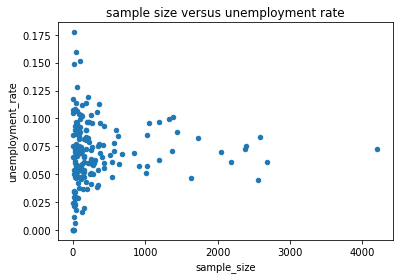

In [13]:
# To scatter plot sample_size and unemployment_rate column.

recent_grads.plot(x='sample_size', y='unemployment_rate', kind='scatter', title = "sample size versus unemployment rate")

Unemployment rate among various majors tend to concentrate between 5 and 10 percent. As the sample size increases, the unemployment rate narrows between 5 and 10 percent. 

> Thus a student pursuing a popular major doesn't necessarily have more opportunity than those pursuing a less popular major. 

Now let's do a scatter plot for `women_share` and `median` column.

<AxesSubplot:title={'center':'women_share versus median salary'}, xlabel='women_share', ylabel='median'>

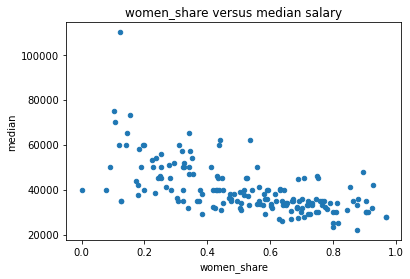

In [14]:
# To scatter plot women_share and median column.

recent_grads.plot(x='women_share', y='median', kind='scatter', title = "women_share versus median salary")

As the share of women in a major increases, the median salary decreases.

> Thus students that majored in subjects that were majority female probably make less money than those with less share of women.

Now let's do a scatter plot for `men` and `median` column.

<AxesSubplot:title={'center':'men versus median salary'}, xlabel='men', ylabel='median'>

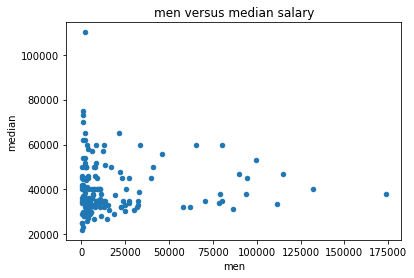

In [15]:
# To scatter plot men and median column.

recent_grads.plot(x='men', y='median', kind='scatter', title = "men versus median salary")

Now let's do a scatter plot for `women` and `median` column.

<AxesSubplot:title={'center':'women versus median salary'}, xlabel='women', ylabel='median'>

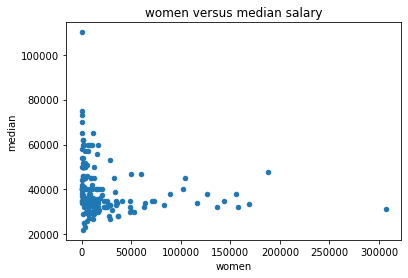

In [16]:
# To scatter plot women and median column.

recent_grads.plot(x='women', y='median', kind='scatter', title = "women versus median salary")

Generally, as the number of men or women in a major increases, the median salary decreases. This decrease in salary might be due to the high number of possible candidates against a few job openings(ie, More supply than demand).

Let's explore the distribution of values in `sample_size` column.

count     172.000000
mean      357.941860
std       619.680419
min         2.000000
25%        42.000000
50%       131.000000
75%       339.000000
max      4212.000000
Name: sample_size, dtype: float64


<AxesSubplot:title={'center':'distribution of sample size'}, ylabel='Frequency'>

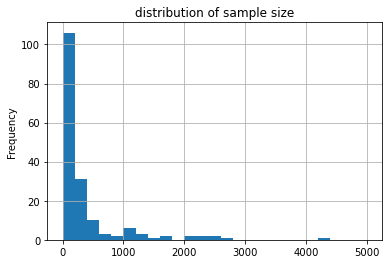

In [17]:
# To explore the distribution of values in sample_size column.

print(recent_grads['sample_size'].describe())
recent_grads["sample_size"].plot.hist(
                                       bins=25, range=(0,5000), 
                                       title = "distribution of sample size",
                                       grid = True
                                     )

Each bin represents 200 sample size. More than 75 percent of the sample size fall below 400. As the number of sample size increase beyond 400, the frequency drops below 10 as shown above. This means that for most of the analysis on various majors the sample size under consideration was very less. This in turn might be due to the extreme popularity of few of the majors over the rest.

Now let's explore the distribution of values in `Median` column.

count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: median, dtype: float64


<AxesSubplot:title={'center':'distribution of median salary'}, ylabel='Frequency'>

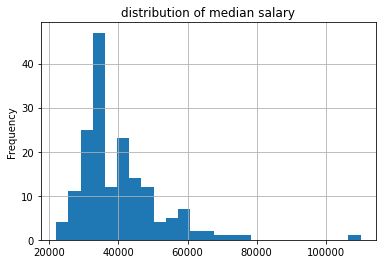

In [18]:
# To explore the distribution of values in median column.

print(recent_grads['median'].describe())
recent_grads['median'].plot.hist(
                                       bins=25,
                                       title = "distribution of median salary",
                                       grid = True
                                )

More than 50 percent of the median salary fall below 40,000 and more than 75 percent of median salary fall below 50,000. This means that more than 75 percent of the majors have a median salary of less than 50,000. The salary distribution decreases when we move on to higher figures as seen from the above plot. This indicate that there are only a handful of majors that have a median earning potential of more than 60,000.

Let's explore the distribution of values in `employed` column.

count       172.00000
mean      31355.80814
std       50777.42865
min           0.00000
25%        3734.75000
50%       12031.50000
75%       31701.25000
max      307933.00000
Name: employed, dtype: float64


<AxesSubplot:title={'center':'distribution of employed'}, ylabel='Frequency'>

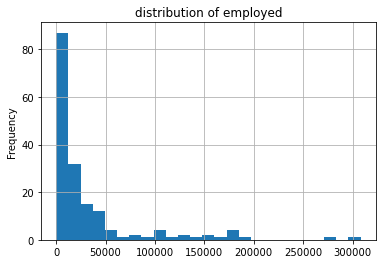

In [19]:
# To explore the distribution of values in employed column.

print(recent_grads['employed'].describe())
recent_grads['employed'].plot.hist(
                                       bins=25,
                                       title = "distribution of employed",
                                       grid = True
                                    )

More than 90 percent of the employed persons in a major fall below 50,000. There are only a handful of majors that have the number of employed people to be more than 50,000.

Let's explore the distribution of values in `full_time` column.

count       172.000000
mean      26165.767442
std       42957.122320
min         111.000000
25%        3181.000000
50%       10073.500000
75%       25447.250000
max      251540.000000
Name: full_time, dtype: float64


<AxesSubplot:title={'center':'distribution of full time employee'}, ylabel='Frequency'>

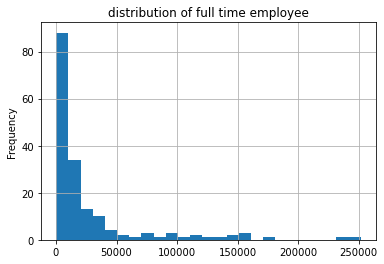

In [20]:
# To explore the distribution of values in full_time column.

print(recent_grads['full_time'].describe())
recent_grads['full_time'].plot.hist(
                                       bins=25,
                                       title = "distribution of full time employee",
                                       grid = True
                                    )

This column follows the trend similar to `employed` column. Most of the major that employs full time have a number of less than 50,000. Only a handful of major employs more than 50,000 people full time as shown from the above plot.

Let's explore the distribution of values in `women_share` column.

count    172.000000
mean       0.522223
std        0.231205
min        0.000000
25%        0.336026
50%        0.534024
75%        0.703299
max        0.968954
Name: women_share, dtype: float64


<AxesSubplot:title={'center':'distribution of women share'}, ylabel='Frequency'>

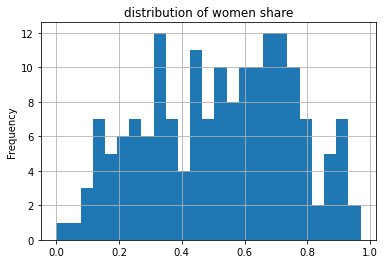

In [21]:
# To explore the distribution of values in women_share column.

print(recent_grads["women_share"].describe())
recent_grads['women_share'].plot.hist(
                                       bins=25,
                                       title = "distribution of women share",
                                       grid = True
                                    )

Around 50 percent of the majors has a women share of less than half. The rest of the majors have a class with more women. There are no majors with only women students, but there are majors with zero women . The maximum women share is ~0.97 and the minimum is 0.

Let's explore the distribution of values in `unemployment_rate` column.

count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: unemployment_rate, dtype: float64


<AxesSubplot:title={'center':'distribution of unemployment rate'}, ylabel='Frequency'>

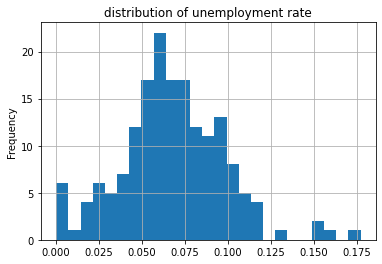

In [22]:
# To explore the distribution of values in unemployment_rate column.

print(recent_grads["unemployment_rate"].describe())
recent_grads["unemployment_rate"].plot.hist(
                                       bins=25,
                                       title = "distribution of unemployment rate",
                                       grid = True
                                    )

Around 50% of the majors has an unemployment rate of below 6.75%. Only a handful of majors has an unemployment rate above 15%. The minimum rate is 0% and the maximum rate is 17.7%.

Let's explore the distribution of values in `men` column.

count       172.000000
mean      16723.406977
std       28122.433474
min         119.000000
25%        2177.500000
50%        5434.000000
75%       14631.000000
max      173809.000000
Name: men, dtype: float64


<AxesSubplot:title={'center':'distribution of men'}, ylabel='Frequency'>

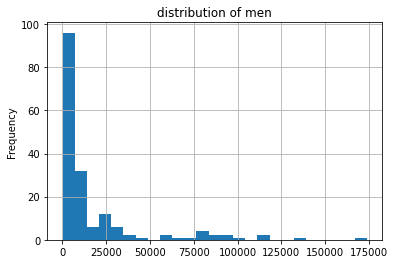

In [23]:
# To explore the distribution of values in men column.

print(recent_grads["men"].describe())
recent_grads['men'].plot.hist(
                                       bins=25,
                                       title = "distribution of men",
                                       grid = True
                                )

Around 80% of the majors has the number of men below 25,000. The minimum number of men in any major is 119 and the maximum is 173,809. There are only a handful of majors that has the number of men to be more than 75,000.

Let's explore the distribution of values in `women` column.

count       172.000000
mean      22646.674419
std       41057.330740
min           0.000000
25%        1778.250000
50%        8386.500000
75%       22553.750000
max      307087.000000
Name: women, dtype: float64


<AxesSubplot:title={'center':'distribution of women'}, ylabel='Frequency'>

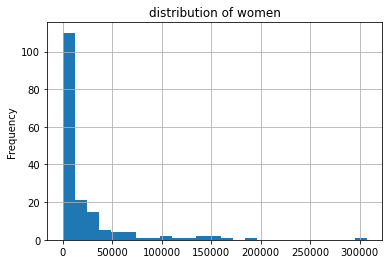

In [24]:
# To explore the distribution of values in women column.

print(recent_grads["women"].describe())
recent_grads['women'].plot.hist(
                                       bins=25,
                                       title = "distribution of women",
                                       grid = True
                                )

There where no majors with no men, bur there are majors with no women. More than a quarter of majors have the number of women less than 2,500 and 80% of majors have less than 30,000 women. Only a handful of majors have more than 50,000 women.

Now let's use scatter matrix to plot `sample_size` and `median` columns.

array([[<AxesSubplot:xlabel='sample_size', ylabel='sample_size'>,
        <AxesSubplot:xlabel='median', ylabel='sample_size'>],
       [<AxesSubplot:xlabel='sample_size', ylabel='median'>,
        <AxesSubplot:xlabel='median', ylabel='median'>]], dtype=object)

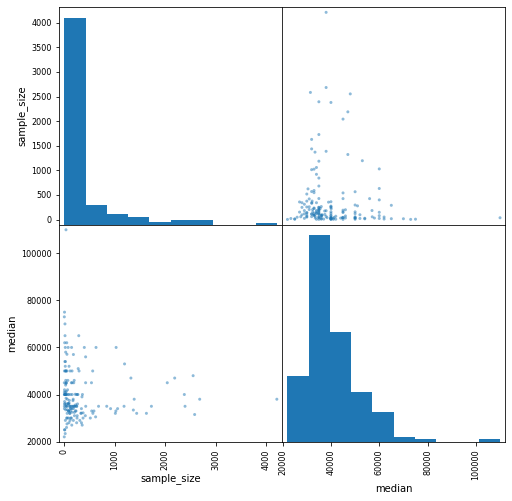

In [25]:
# To scatter matrix plot sample_size and median columns.

pd.plotting.scatter_matrix(recent_grads[["sample_size","median"]], figsize=(8,8))

Let's use scatter matrix plot for `sample_size`, `median` and `unemployment_rate` columns.

array([[<AxesSubplot:xlabel='sample_size', ylabel='sample_size'>,
        <AxesSubplot:xlabel='median', ylabel='sample_size'>,
        <AxesSubplot:xlabel='unemployment_rate', ylabel='sample_size'>],
       [<AxesSubplot:xlabel='sample_size', ylabel='median'>,
        <AxesSubplot:xlabel='median', ylabel='median'>,
        <AxesSubplot:xlabel='unemployment_rate', ylabel='median'>],
       [<AxesSubplot:xlabel='sample_size', ylabel='unemployment_rate'>,
        <AxesSubplot:xlabel='median', ylabel='unemployment_rate'>,
        <AxesSubplot:xlabel='unemployment_rate', ylabel='unemployment_rate'>]],
      dtype=object)

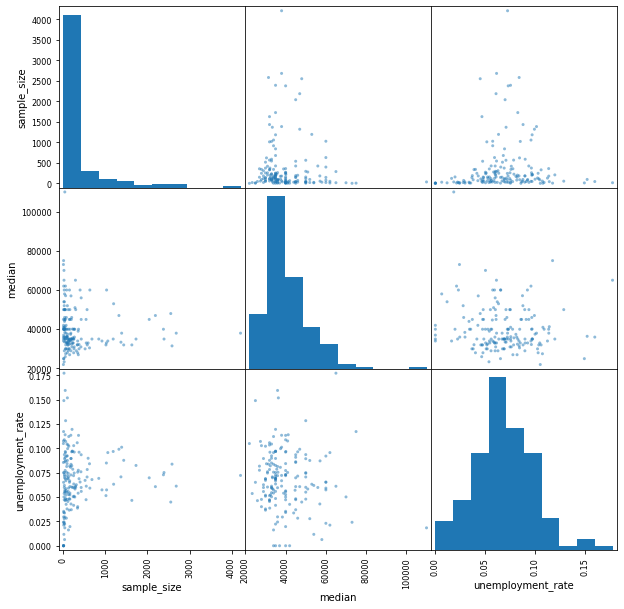

In [26]:
# To scatter matrix plot sample_size, median and unemployment_rate columns.

pd.plotting.scatter_matrix(recent_grads[["sample_size","median","unemployment_rate"]], figsize=(10,10))

Questions to consider for our analysis are as follows.

* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there any link between the number of full-time employees and median salary?

More sample_size represents a more popular major. As suggested by our earlier observations, most the sample_size values are less than 400. This represents a few majors with extreme popularity over others. As the sample size increases the salary tend to decrease. Some less popular majors tend to make more money than popular majors and there are examples where less popular major make less money than popular majors. This confirms our earlier assertion that a student pursuing a popular major isn't guaranteed to make more money than those pursuing a less popular major.

Most of the majors have an unemployment rate between 5 and 10 percent. As the popularity of major increases the unemployment rate falls in between 5 and 10 percent. Some less popular majors have low unemployment rating than popular majors and there are examples where a less popular major have more unemployment rating than popular majors. This confirms our earlier assertion that a student pursuing a popular major doesn't necessarily have more opportunity than those pursuing a less popular major. 

An interesting observations in the above plot is the existence of majors that have a high median salary and a low unemployment rate. This translates to a high reward for less risk. Furthermore, there are majors with less earning potential and more unemployment rate.

The observations made are as follows.

* Few majors are extremely popular than the rest.
* A student pursuing a popular major isn't guaranteed to make more money than those pursuing a less popular major.
* A student pursuing a popular major doesn't necessarily have more opportunity than those pursuing a less popular major. 
* There are majors with low unemployment rate and very high earning potential.

array([[<AxesSubplot:xlabel='women_share', ylabel='women_share'>,
        <AxesSubplot:xlabel='median', ylabel='women_share'>,
        <AxesSubplot:xlabel='full_time', ylabel='women_share'>],
       [<AxesSubplot:xlabel='women_share', ylabel='median'>,
        <AxesSubplot:xlabel='median', ylabel='median'>,
        <AxesSubplot:xlabel='full_time', ylabel='median'>],
       [<AxesSubplot:xlabel='women_share', ylabel='full_time'>,
        <AxesSubplot:xlabel='median', ylabel='full_time'>,
        <AxesSubplot:xlabel='full_time', ylabel='full_time'>]],
      dtype=object)

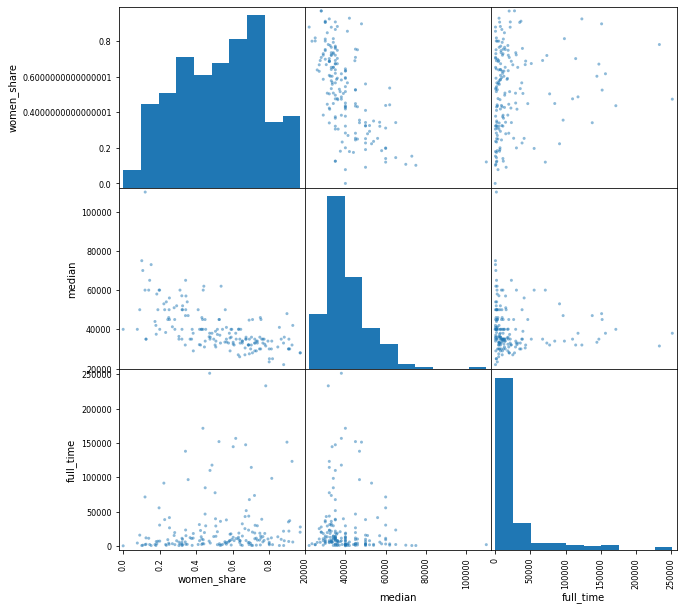

In [27]:
# To scatter matrix plot women_share, median and full_time columns.

pd.plotting.scatter_matrix(recent_grads[["women_share","median","full_time"]], figsize=(10,10))

As the share of women in a major increases the median salary decreases. Thus students that majored in subjects that were majority female probably make less money than those with less share of women.

As the number of full time employees increases in a major, the median salary tend to decrease and average out around 40,000. There are majors with less full time employees that make more money and those that make less money on average.

The observations made are as follows.

* Students that majored in subjects that were majority female probably make less money than those with less share of women.
* Majors with more full time employees tend to make between 30,000 and 50,000.

Let's create bar plots to compare the percentages of women (`women_share`) from the first ten rows and last ten rows of the `recent_grads` dataframe.

0    0.120564
1    0.101852
2    0.153037
3    0.107313
4    0.341631
5    0.144967
6    0.441356
7    0.535714
8    0.119559
9    0.196450
Name: women_share, dtype: float64


<AxesSubplot:title={'center':'women share for first 10 rows'}>

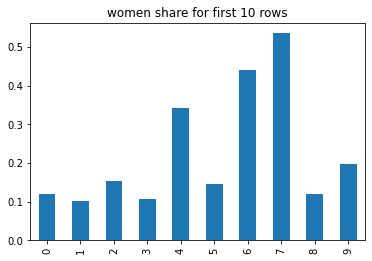

In [28]:
# To bar plot the first 10 rows of women_share column.

first_10_rows = recent_grads.head(10)
print(first_10_rows['women_share'])
first_10_rows['women_share'].plot(
                                    kind='bar', title = "women share for first 10 rows"
                                 )

163    0.967998
164    0.968954
165    0.690111
166    0.666119
167    0.629505
168    0.637293
169    0.817099
170    0.799859
171    0.798746
172    0.877960
Name: women_share, dtype: float64


<AxesSubplot:title={'center':'women share for last 10 rows'}>

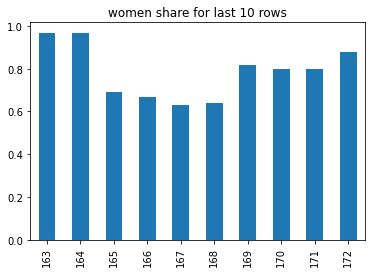

In [29]:
# To bar plot the last 10 rows of women_share column.

last_10_rows = recent_grads.tail(10)
print(last_10_rows['women_share'])
last_10_rows['women_share'].plot(
                                    kind='bar', title = "women share for last 10 rows"
                                )

The entire `recent_grads` dataframe is arranged in descending order based on the median salary of various majors. The first 10 rows represents the majors with highest earning potential and the last 10 rows represents the majors with lowest earning potential. 

The percentage of women is less than 25% for 7 out of 10 top majors and the top women_share is only 53.57% for the top 10 majors. Whereas, the women_share of bottom 10 majors are above 60% for all the cases. This confirms that the majors with high percentage of women probably has low earning potential.

Let's create bar plots to compare the unemployment rate (`unemployment_rate`) from the first ten rows and last ten rows of the recent_grads dataframe.

0    0.018381
1    0.117241
2    0.024096
3    0.050125
4    0.061098
5    0.177226
6    0.095652
7    0.021167
8    0.057342
9    0.059174
Name: unemployment_rate, dtype: float64


<AxesSubplot:title={'center':'unemployment rate for first 10 rows'}>

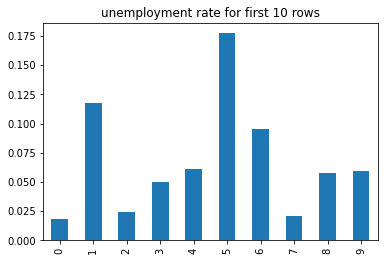

In [30]:
# To bar plot the first 10 rows of unemployment_rate column.

print(first_10_rows['unemployment_rate'])
first_10_rows['unemployment_rate'].plot(
                                        kind='bar', title = "unemployment rate for first 10 rows"
                                        )

163    0.047584
164    0.040105
165    0.107116
166    0.077541
167    0.081742
168    0.046320
169    0.065112
170    0.149048
171    0.053621
172    0.104946
Name: unemployment_rate, dtype: float64


<AxesSubplot:title={'center':'unemployment rate for last 10 rows'}>

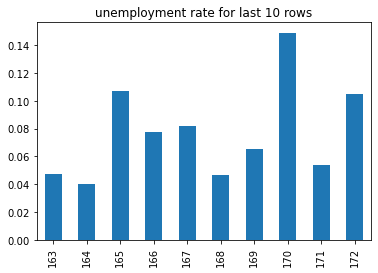

In [31]:
# To bar plot the last 10 rows of unemployment_rate column.

print(last_10_rows['unemployment_rate'])
last_10_rows['unemployment_rate'].plot(
                                        kind = 'bar', title = "unemployment rate for last 10 rows"
                                       )

For 10 majors with high earning potential, the unemployment rate is below 6.2% for 7 majors and the maximum rate is 17.7%. 

For 10 majors with least earning potential, the unemployment rate is below 6.2% for only 4 majors and the maximum rate is 14.9%.

Next we will compute the average unemployment rate for both top 10 and bottom 10 majors.

In [32]:
avg_top_10_majors = (first_10_rows['unemployment_rate'].mean()) * 100
avg_bottom_10_majors = (last_10_rows['unemployment_rate'].mean()) * 100
print("The average unemployement rate for top 10 major is ", avg_top_10_majors)
print("The average unemployement rate for bottom 10 major is ", avg_bottom_10_majors)

The average unemployement rate for top 10 major is  6.815034360000001
The average unemployement rate for bottom 10 major is  7.73135073


> Thus majors with high earning potential has low unemployment rate when compared with majors of low earning potential.

Next let's use grouped bar plot to compare the number of men with the number of women in each category of majors.

In [33]:
# To find the various major categories.

major_category = recent_grads["major_category"].value_counts().sort_values(ascending = False).index
print(major_category)

Index(['Engineering', 'Education', 'Humanities & Liberal Arts',
       'Biology & Life Science', 'Business', 'Health',
       'Computers & Mathematics', 'Physical Sciences',
       'Agriculture & Natural Resources', 'Psychology & Social Work',
       'Social Science', 'Arts', 'Industrial Arts & Consumer Services',
       'Law & Public Policy', 'Communications & Journalism',
       'Interdisciplinary'],
      dtype='object')


In [34]:
# To find the number of men and women in each major categories.

men_women_count_in_major_category = {}
for value in major_category:
    women = recent_grads.loc[recent_grads["major_category"] == value, "women"].sum()
    men = recent_grads.loc[recent_grads["major_category"] == value, "men"].sum()
    men_women_count_in_major_category[value] = [men, women] 

<AxesSubplot:title={'center':'men versus women in each major category'}>

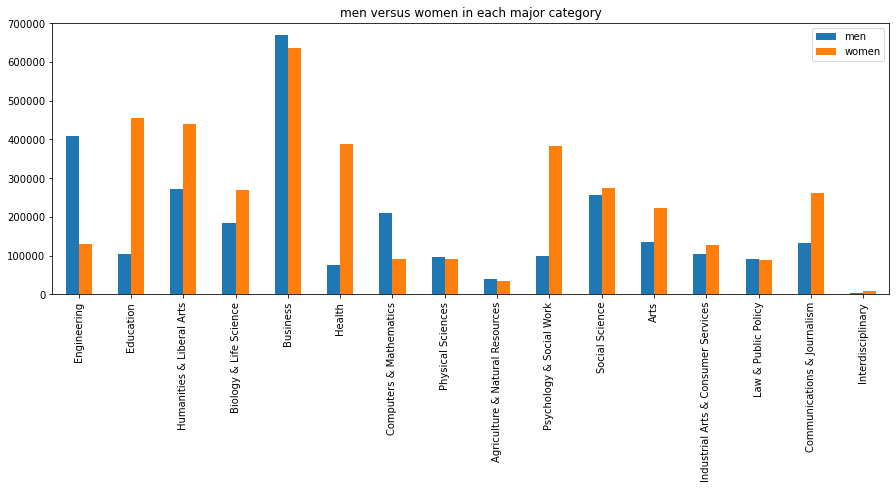

In [35]:
# To generate grouped bar plot to compare the number of men with the number of women in each category of majors.

men_women_in_major_category = pd.DataFrame.from_dict( men_women_count_in_major_category, orient='index', 
                                                      columns = ["men", "women"]
                                                    )
men_women_in_major_category.plot.bar(
                                        rot= 90, figsize=(15,5), 
                                        title = "men versus women in each major category"
                                    )

There are 16 major categories. The number of women is more in 10 categories. Business is the category with maximum number of students and interdisciplinary is the one with least number of students. Engineering is the only major dominated by men by over 200,000 students. Education, Health, Psychology & Social Work are dominated by women by over 200,000 students.

> Engineering contain predominantly male students and Education, Health, Psychology & Social Work contain predominantly female students.

> Business is the category with maximum number of students and interdisciplinary is the one with least number of students.

Next let's use box plot to explore the distributions of median salaries and unemployment rate.

count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: median, dtype: float64


<AxesSubplot:title={'center':'box whisker plot for median salaries'}>

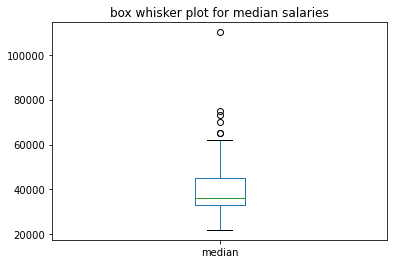

In [36]:
# To box plot the distributions of median salaries.

print(recent_grads["median"].describe())
recent_grads['median'].plot(kind = "box", title = "box whisker plot for median salaries")

The 25 percentile of median salary is 33,000 and the 50 percentile is 36,000. This indicates that over 25% of the total median salaries from all majors are within 3,000. The 75 percentile of median salary is 45,000. This indicate that a majority of students earn in between this gap. There are some outliners beyond 65,000 as shown in the above plot.

count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: unemployment_rate, dtype: float64


<AxesSubplot:title={'center':'box whisker plot for unemployment rate'}>

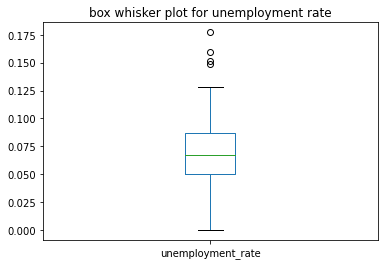

In [37]:
# To box plot the distributions of unemployment rate.

print(recent_grads["unemployment_rate"].describe())
recent_grads['unemployment_rate'].plot(kind = "box", title = "box whisker plot for unemployment rate")

The unemployment rate in various majors varies from 5% in 25 percentile to 8.7% in 75 percentile. Anything above a 13% unemployment rate is considered to be an outliner as shown in the above plot.

## Conclusions

Some conclusions are paradoxical in nature and they are as follows.

* A student enrolled in a popular major isn't guaranteed to have a high earning potential.
* Majors with greater women share tends to have less earning potential. 
* There are majors with low unemployment rate and very high earning potential.

The effects of gender distribution and popularity of majors on the future earning potential is successfully visualized.